In [1]:
!pip install matplotlib seaborn

Summary Statistics:
              count unique                      top freq       mean  \
PassengerId  891.0    NaN                      NaN  NaN      446.0   
Survived     891.0    NaN                      NaN  NaN   0.383838   
Pclass       891.0    NaN                      NaN  NaN   2.308642   
Name           891    891  Braund, Mr. Owen Harris    1        NaN   
Sex            891      2                     male  577        NaN   
Age          714.0    NaN                      NaN  NaN  29.699118   
SibSp        891.0    NaN                      NaN  NaN   0.523008   
Parch        891.0    NaN                      NaN  NaN   0.381594   
Ticket         891    681                   347082    7        NaN   
Fare         891.0    NaN                      NaN  NaN  32.204208   
Cabin          204    147                  B96 B98    4        NaN   
Embarked       889      3                        S  644        NaN   

                    std   min     25%      50%    75%       max  
Pa

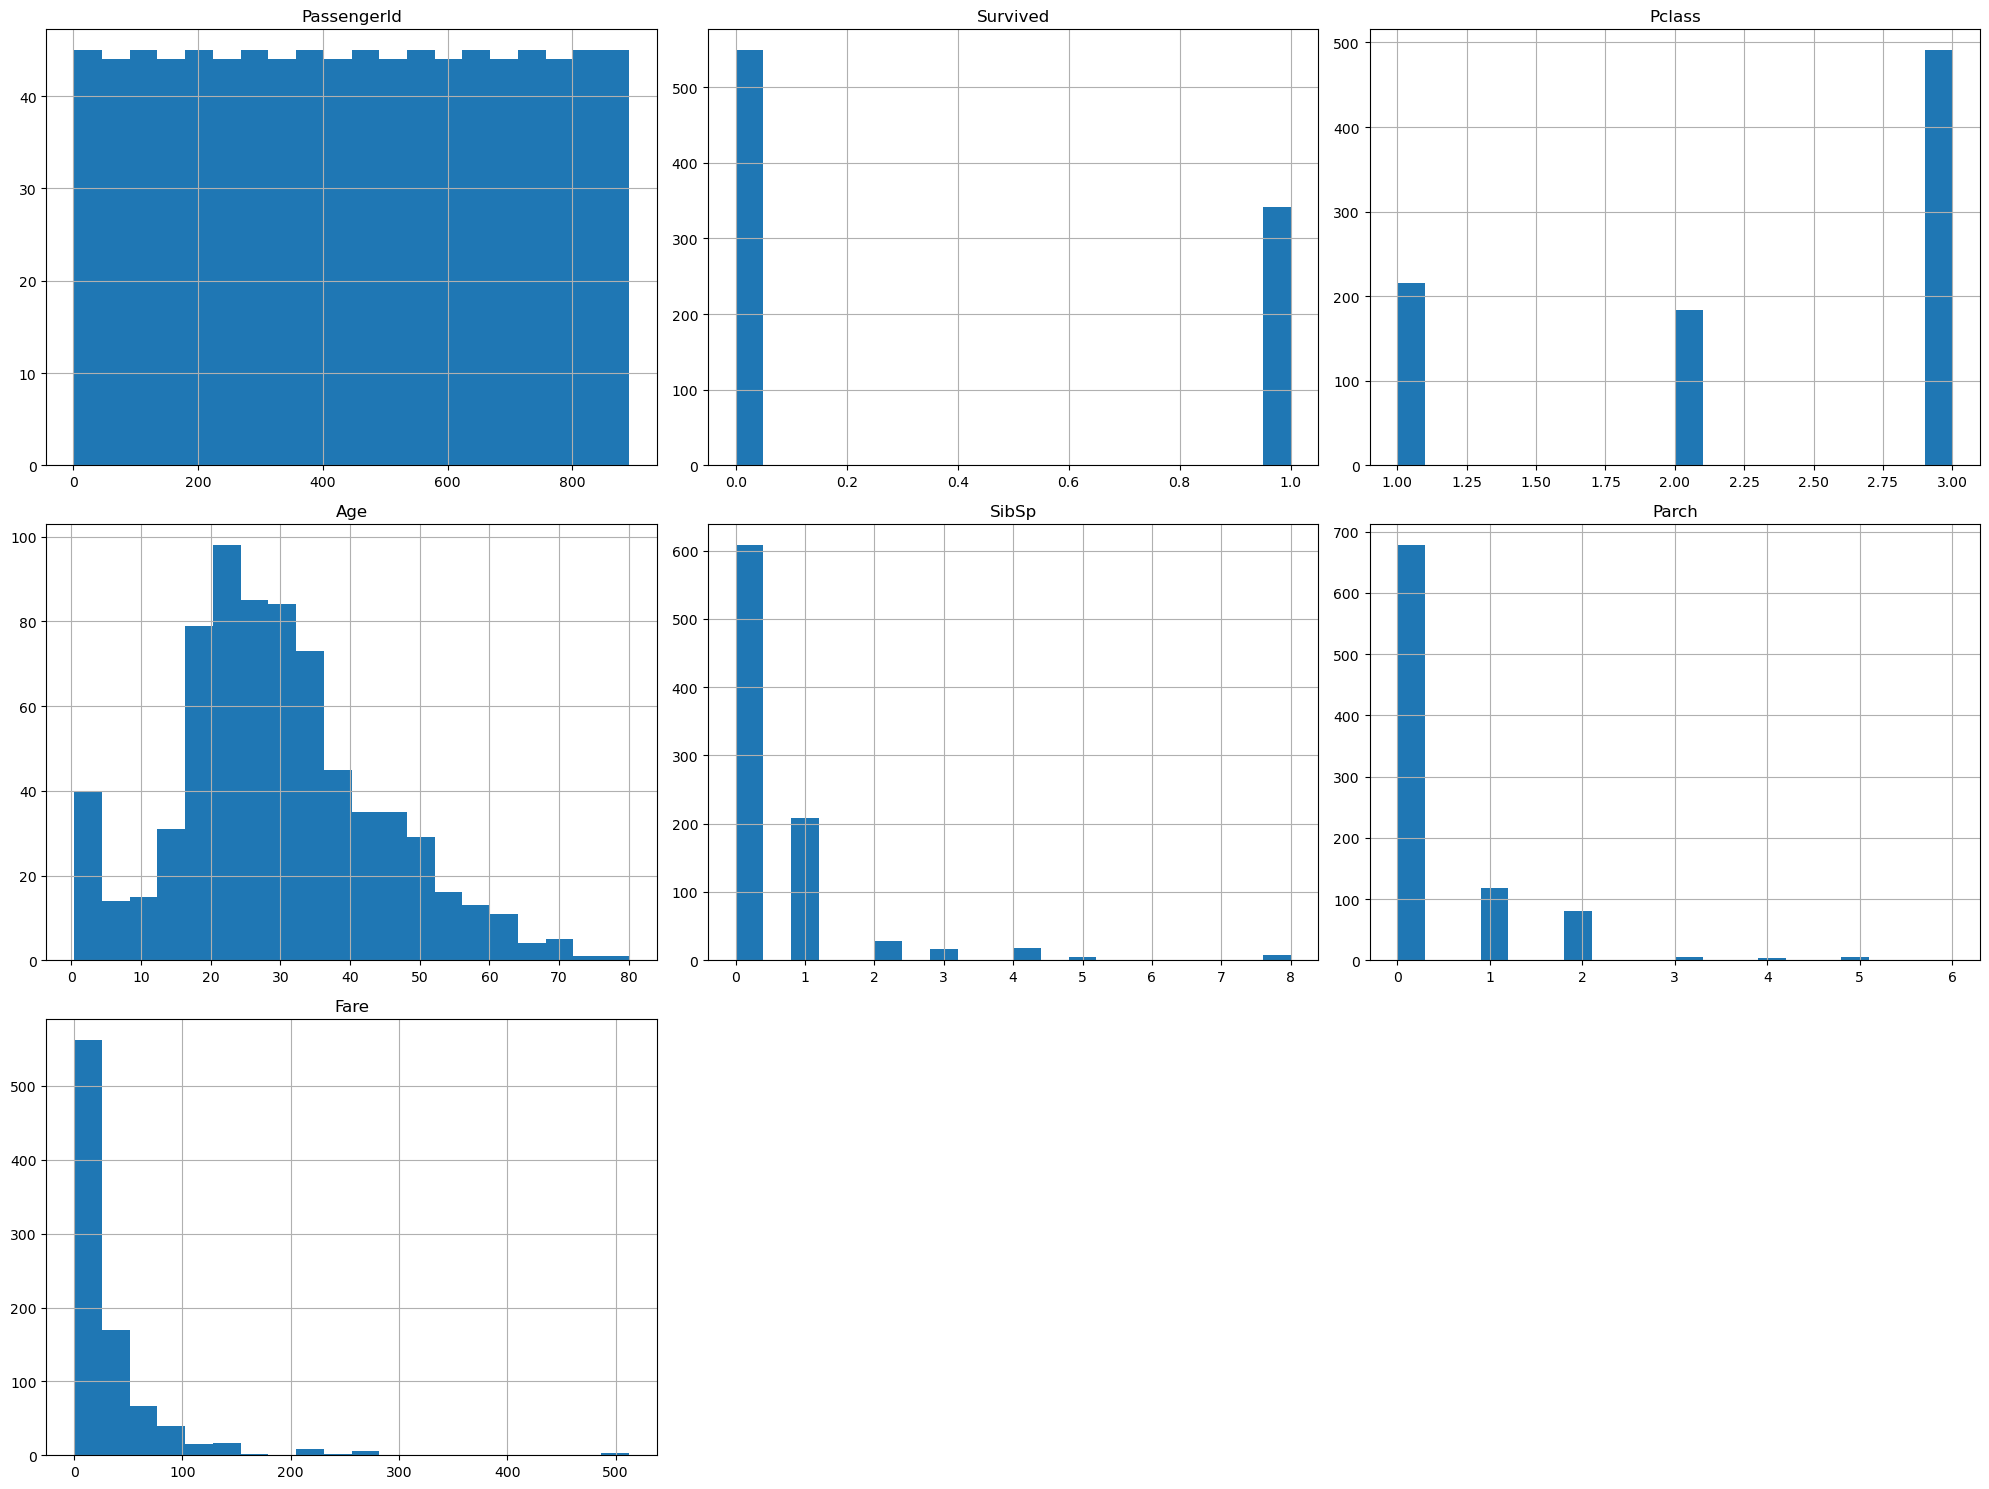

Accuracy: 0.8044692737430168
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



C:\Users\Admin\AppData\Local\Temp\ipykernel_19104\2483491443.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19104\2483491443.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [ ]:
import pandas as pd
import numpy as np

# Reading CSV file
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

# a) Compute and display summary statistics for each feature
summary_stats = data.describe(include='all').transpose()
numeric_summary_stats = data.describe().transpose()
numeric_summary_stats['range'] = numeric_summary_stats['max'] - numeric_summary_stats['min']
numeric_summary_stats['variance'] = data.select_dtypes(include=[np.number]).var()

# Calculate percentiles separately
percentiles = data.select_dtypes(include=[np.number]).quantile([0.25, 0.5, 0.75]).transpose()
percentiles.columns = ['25%', '50%', '75%']

print("Summary Statistics:\n", summary_stats)
print("\nNumeric Summary Statistics:\n", numeric_summary_stats)
print("\nPercentiles:\n", percentiles)

import matplotlib.pyplot as plt
import seaborn as sns

# Create histograms for each feature
data.hist(bins=20, figsize=(20, 15))
plt.tight_layout()
plt.show()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Data Cleaning
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

# Drop columns that won't be used in the model
data.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)

# Convert categorical columns to numerical
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Split data into features and target variable
X = data.drop('Survived', axis=1)
y = data['Survived']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# (Classification)
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))